In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('loan.csv')

In [3]:
# Understanding data size in raw form
data.shape

(39717, 111)

In [4]:
#data quick look
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
# getting basic numerical insights from data
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
#check for null values
data_null=data.isnull().sum()
print(data_null)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


From above it is observed that there are multiple columns with all/most Null values. We can check the percentage of null values

In [8]:
per_null=data.isnull().sum()/len(data)*100

In [9]:
# finding columns with more than 30% null values
per_null[per_null>30.0].count()

58

From above total of 58 columns that are eligible to be dropped from the dataset

In [10]:
data.drop(per_null[per_null>30.0].index,axis=1,inplace=True)
data.shape

(39717, 53)

In [11]:
#checking again for nulls
data_null=data.isnull().sum()
print(data_null)

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [12]:
#Finding unique values in all columns
single_value_cols=data.nunique()
single_value_cols

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [13]:
# finding columns with lesser unique values to remove them
svc=single_value_cols[single_value_cols.values<=1]
svc.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [14]:
data.drop(columns=list(svc.index),axis=1,inplace=True)

In [15]:
#rechecking the shape of dataset
data.shape

(39717, 44)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

From visual exploration of dataset we understand there are features irrelevant for business objective. Listing them to remove them from overall data.
1. collection_recovery_fee- not so relevant to usecase. This attribute helps to analyse after loan is defaulted
2. desc - Description about the loan is not very crucial to predict defaulter
3. emp_title - Name does not contribute much for final decision
4. id - Just and identifier and no significant role in decision making
5. last_credit_pull_dlast_pymnt_amnt,last_pymnt_d- Gives information about payment after loand dispersal
6. member_id - Again an identifier nothing crucial for analysis
7. recoveries - gives post dispersal information and not really needed
8. title - Title from the borrower is not very helpful in our anlaysis
9. url - Documentary column
10. zip_code - Could be of help to cluster participants. But not to predict loan defaulter


In [17]:
drop_cols=['collection_recovery_fee','emp_title','id','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','member_id'
               ,'recoveries','title','url','zip_code']

In [18]:
# Dropping above found columns
data.drop(drop_cols,axis=1,inplace=True)

In [19]:
# check for data shape
data.shape

(39717, 33)

From understanding of our Business requirement, we understand we do not need data about an processed application. so we can drop such columns from overall data
1.out_prncp,out_prncp_inv
2.total_rec_int,total_rec_late_fee,total_rec_prncp


In [20]:
drop_cols_1=['out_prncp','out_prncp_inv','total_rec_int','total_rec_late_fee','total_rec_prncp']

In [21]:
#further dropping of columns
data.drop(drop_cols_1,axis=1,inplace=True)

In [22]:
data.shape

(39717, 28)

## Data Cleaning

In [23]:
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,12153.596544,11567.149118,0.043260
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,9042.040766,8942.672613,0.204324
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,5576.930000,5112.310000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,9899.640319,9287.150000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,16534.433040,15798.810000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,58563.679930,58563.680000,2.000000


In [24]:
data.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Jan-85,1,3,0,13648,83.70%,9,5863.155187,5833.84,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Nov-01,2,2,0,2956,98.50%,10,3005.666844,3005.67,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,Jan-96,0,15,0,27783,53.90%,38,3513.330000,3513.33,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,Nov-04,3,9,0,7963,28.30%,12,5632.210000,5632.21,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,8 years,RENT,...,Jul-05,1,7,0,17726,85.60%,11,10110.840000,10110.84,0.0
7,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,9 years,RENT,...,Jan-07,2,4,0,8221,87.50%,4,3939.135294,3939.14,0.0
8,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,4 years,OWN,...,Apr-04,2,11,0,5210,32.60%,13,646.020000,646.02,0.0
9,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,< 1 year,RENT,...,Sep-04,0,2,0,9279,36.50%,3,1476.190000,1469.34,0.0


### Starting of cleaning by removing NULL values

Finding out total NULL values in the data set

In [25]:
data.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
pub_rec_bankruptcies     697
dtype: int64

The above check shows null values in 3 columns emp_length,revol_util,pub_rec_bankruptcies but very minimal compared to total number of records. So we can try imputing values in place of Null values and consider removing rows with NULLs.

In [26]:
data.emp_length.describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [27]:
data.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

Above code shows the data is asymmetrical and is skewed. Also the percentage of null values is far less when compared to the total count. hence it is advisable to impute null values with mode

In [28]:
data.emp_length.fillna(data.emp_length.mode()[0], inplace = True)

In [29]:
data.revol_util.isnull().sum()/len(data.revol_util)*100

0.12589067653649572

We also observed the percentage of NULLs in revol_util is very minimal. Hence dropping those rows will be a better option

In [30]:
data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)

In [31]:
data.pub_rec_bankruptcies.value_counts()

0.0    37290
1.0     1673
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [32]:
data.pub_rec_bankruptcies.isnull().sum()/len(data.pub_rec_bankruptcies)*100

1.757128091360577

As per above findings the column pub_rec_bankruptcies also has minimal NULL valued rows,hence they can be dropped

In [33]:
data.dropna(axis=0,subset=['pub_rec_bankruptcies'],inplace=True)

In [34]:
data.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
total_pymnt             0
total_pymnt_inv         0
pub_rec_bankruptcies    0
dtype: int64

### Formatting column values 

By looking at the column values we understand there are extra characters or strings in the values that need to be removed. And need to assign correct datatype as well.

In [35]:
data.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
pub_rec_bankruptcies    float64
dtype: object

In [36]:
data['int_rate']=data['int_rate'].str.strip('%')
data['revol_util']=data['revol_util'].str.strip('%')

In [37]:
data['issue_d']=pd.to_datetime(data['issue_d'],format='%b-%y')
data['earliest_cr_line']=pd.to_datetime(data['earliest_cr_line'],format='%b-%y')



#### Deriving new columns from date columns that can be helpful during analysis

In [38]:
data['issue_month']=data['issue_d'].dt.month
data['issue_yr']=data['issue_d'].dt.year
data['earliest_cr_month']=data['earliest_cr_line'].dt.month
data['earliest_cr_year']=data['earliest_cr_line'].dt.year
data['earliest_cr_day']=data['earliest_cr_line'].dt.day


In [39]:
data.shape

(38970, 33)

In [40]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies,issue_month,issue_yr,earliest_cr_month,earliest_cr_year,earliest_cr_day
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,83.70,9,5863.155187,5833.84,0.0,12,2011,1,1985,1
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,9.40,4,1008.710000,1008.71,0.0,12,2011,4,1999,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,98.50,10,3005.666844,3005.67,0.0,12,2011,11,2001,1
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,21,37,12231.890000,12231.89,0.0,12,2011,2,1996,1
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,53.90,38,3513.330000,3513.33,0.0,12,2011,1,1996,1


### Univariate Analysis - Numerical values

### Amounts analysis

Text(0.5, 1.0, 'Box - Funded amount')

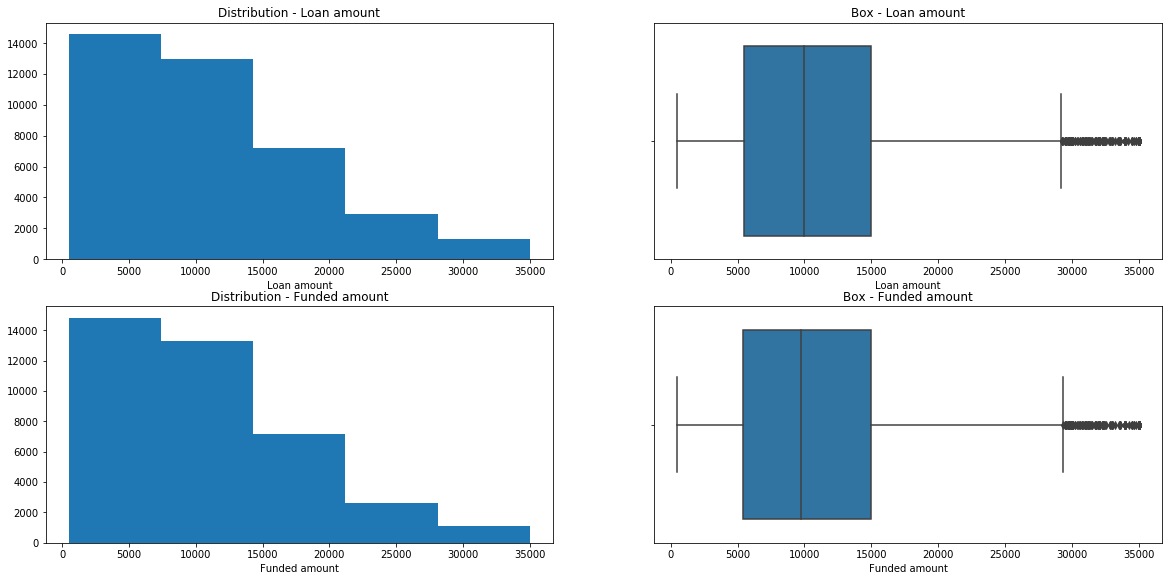

In [41]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
plt.hist(data.loan_amnt,bins=5)
plt.xlabel('Loan amount')
plt.title('Distribution - Loan amount')

plt.subplot(4,2,2)
sns.boxplot(data.loan_amnt)
plt.xlabel('Loan amount')
plt.title('Box - Loan amount')

plt.subplot(4,2,3)
plt.hist(data.funded_amnt,bins=5)
plt.xlabel('Funded amount')
plt.title('Distribution - Funded amount')

plt.subplot(4,2,4)
sns.boxplot(data.funded_amnt)
plt.xlabel('Funded amount')
plt.title('Box - Funded amount')



Observations : From the above plots among amount columns we find
1. There are few outliers above 30000. This implies very few people had applied for loans above 30000. 
2. The distribution shows the data is left skewed.
3. Most people have applied for and bought loans between 5000-15000
4. Both loan amount and Funded amount shows nearly same distribution. Which implies people are granted the amount they requested for most of the time

In [42]:
# Calculating percentage of outliers
len(data[data['loan_amnt']>30000])/len(data)*100

2.1247113163972284

In [43]:
data.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                        object
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                      object
total_acc                        int64
total_pymnt              

### Interest Rate

In [44]:
data['int_rate']=pd.to_numeric(data['int_rate'])

Text(0.5, 0, 'Interest Rate')

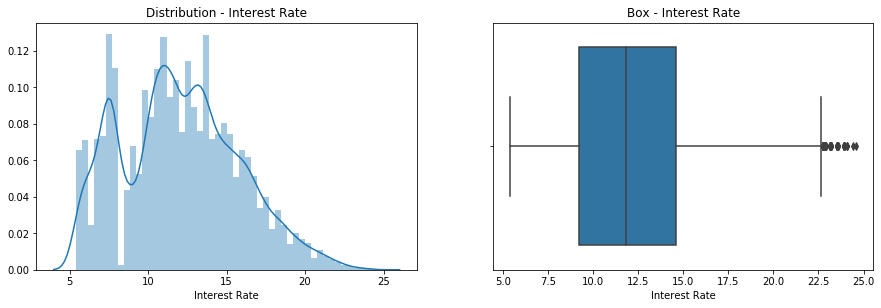

In [45]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(data['int_rate'])
plt.title('Distribution - Interest Rate')
plt.xlabel('Interest Rate')

plt.subplot(2,2,2)
sns.boxplot(data['int_rate'])
plt.title('Box - Interest Rate')
plt.xlabel('Interest Rate')

Observation : From above plots we find
1. Most of the interest rates lie between 10-15%
2. From distribution plot we can observe almost equally spread interest rates between 7.5% - 9% approx.
3. There are outliers in interest rate. Which infers few customers has got a higher interest than 22.5%

In [46]:
#Calculating percentage of outliers in interest rate
len(data[data['int_rate']>22.5])/len(data)*100

0.20015396458814474

Text(0.5, 0, 'Installment')

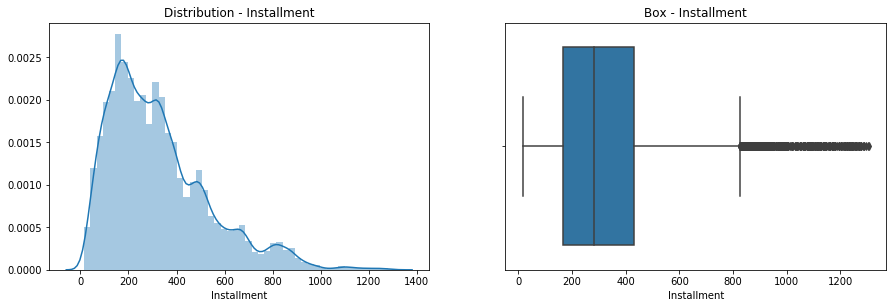

In [47]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(data['installment'])
plt.title('Distribution - Installment')
plt.xlabel('Installment')

plt.subplot(2,2,2)
sns.boxplot(data['installment'])
plt.title('Box - Installment')
plt.xlabel('Installment')

Observation : From the above plot we find
    1. Data is left skewed and installment lies between 180-420 approx.
    2. Outliers pay more than 800 as installment

In [48]:
len(data[data['installment']>800])/len(data)*100

4.069797279958943

Text(0.5, 0, 'Annual income')

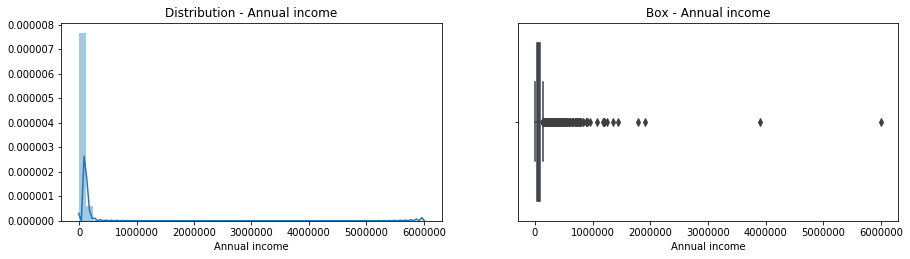

In [49]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
ax=sns.distplot(data['annual_inc'],bins=50)
ax.set_title('Distribution - Annual income')
ax.set_xlabel('Annual income')

plt.subplot(2,2,2)
sns.boxplot(data['annual_inc'])
plt.title('Box - Annual income')
plt.xlabel('Annual income')


Observations : From above plots we can find
1. Data is densely populated near 4000-6000 approx
2. There are many outliers for Annual income
Since the above plot does not give much information about data distribution we can use pandas 'describe' function to understand how annual income is distributed

In [50]:
data['annual_inc'].describe()

count    3.897000e+04
mean     6.898978e+04
std      6.315070e+04
min      4.000000e+03
25%      4.080000e+04
50%      5.910000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

Above function also supports the observation from plots. Data is highly populated between 4000-8000 but the spread is till 60000

### Univariate Analysis Categorical values

#### Term - unique values are 36 & 60

In [51]:
data.term.describe()

count          38970
unique             2
top        36 months
freq           28352
Name: term, dtype: object

Above description shows frequency of 36months is more. This can be combined with other attributes to understand why 36months is the preferred choice.

In [52]:
data.grade.describe()

count     38970
unique        7
top           B
freq      11810
Name: grade, dtype: object

In [53]:
data.sub_grade.describe()

count     38970
unique       35
top          B3
freq       2881
Name: sub_grade, dtype: object

In [54]:
data.home_ownership.describe()

count     38970
unique        4
top        RENT
freq      18487
Name: home_ownership, dtype: object

Text(0.5, 1.0, 'Home ownership')

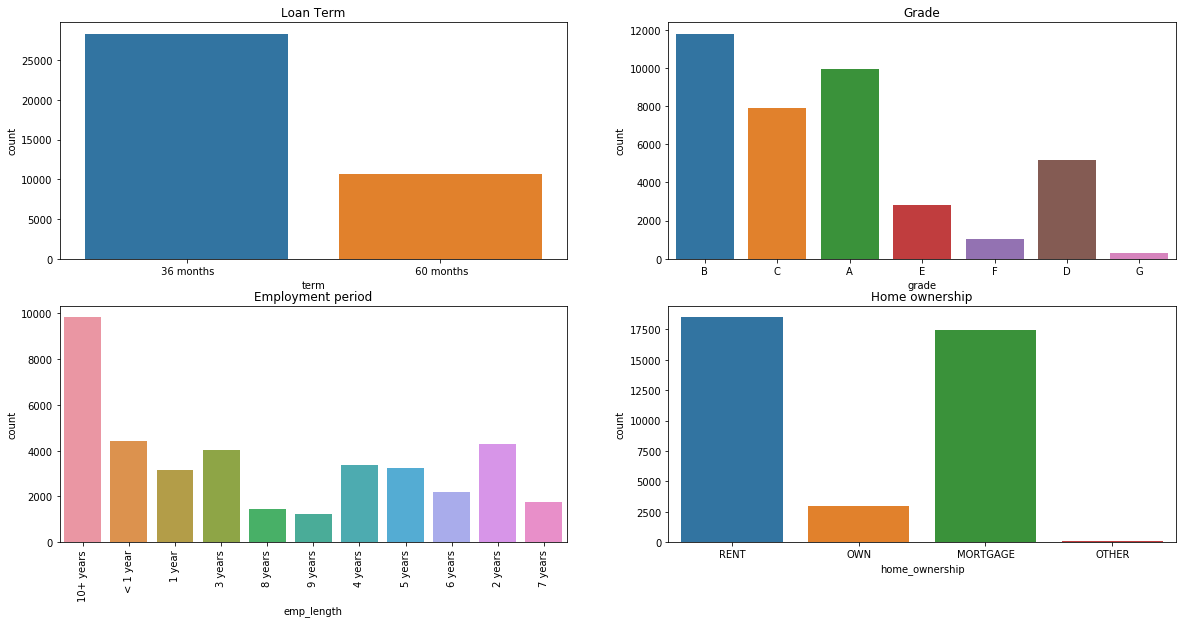

In [55]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.countplot(data['term'])
plt.title("Loan Term")

plt.subplot(4,2,2)
sns.countplot(data['grade'])
plt.title("Grade")

plt.subplot(4,2,3)
sns.countplot(data['emp_length'])
plt.title("Employment period")
plt.xticks(rotation=90)

plt.subplot(4,2,4)
sns.countplot(data['home_ownership'])
plt.title("Home ownership")


In [56]:
data.loan_status.describe()

count          38970
unique             3
top       Fully Paid
freq           32337
Name: loan_status, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

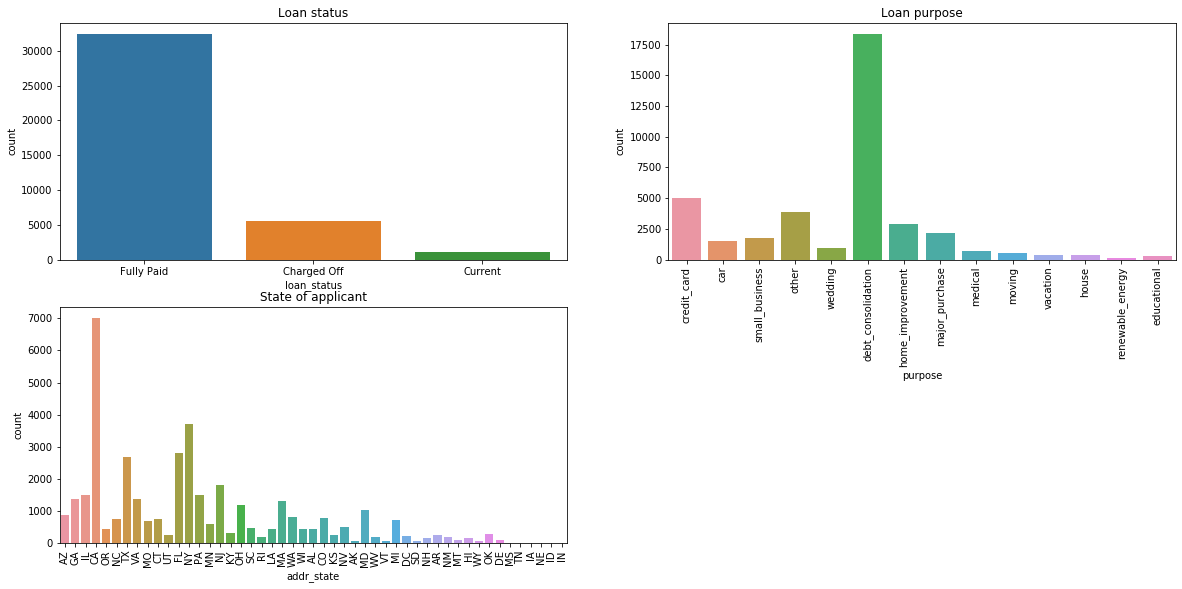

In [57]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.countplot(data['loan_status'])
plt.title("Loan status")

plt.subplot(4,2,2)
sns.countplot(data['purpose'])
plt.title("Loan purpose")
plt.xticks(rotation=90)

plt.subplot(4,2,3)
sns.countplot(data['addr_state'])
plt.title("State of applicant")
plt.xticks(rotation=90)



### Bi-Variate Analysis

### Categorical- Categorical attributes

Since Loan status plays a crucial role in Business decisions, let us understand its relationship with other categorical values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

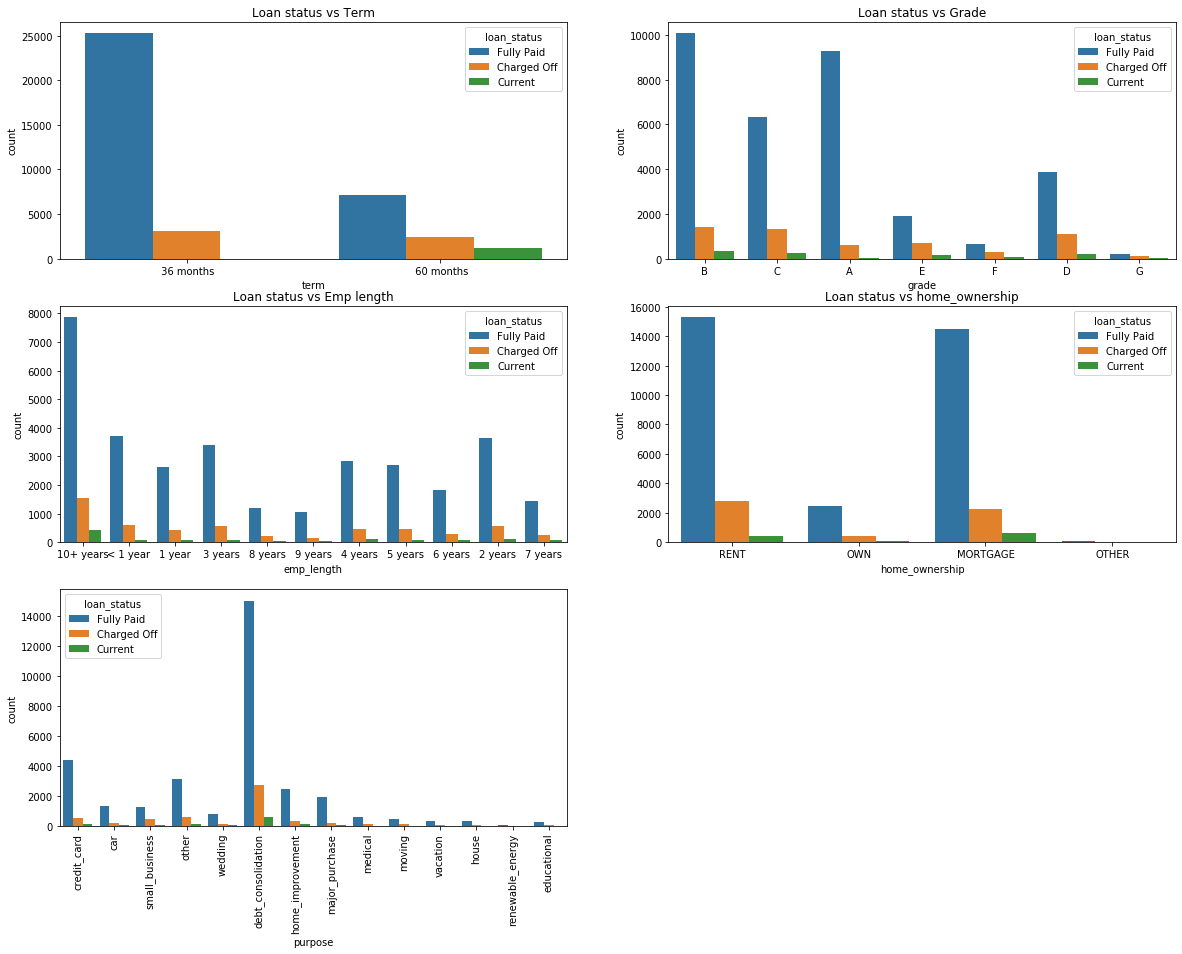

In [58]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.countplot(x=data['term'],data=data,hue=data['loan_status'])
plt.title("Loan status vs Term")

plt.subplot(4,2,2)
sns.countplot(x=data['grade'],data=data,hue=data['loan_status'])
plt.title("Loan status vs Grade")

plt.subplot(4,2,3)
sns.countplot(x=data['emp_length'],data=data,hue=data['loan_status'])
plt.title("Loan status vs Emp length")

plt.subplot(4,2,4)
sns.countplot(x=data['home_ownership'],data=data,hue=data['loan_status'])
plt.title("Loan status vs home_ownership")

plt.subplot(4,2,5)
sns.countplot(x=data['purpose'],data=data,hue=data['loan_status'])
plt.xticks(rotation=90)

Observation - From above plots we understand the following
1. proportion of applicants charged off in 60months term is more in comparison with those of 36months
2. Interestingly people in grade F and G has charged off more in comparison with other grades
3. Employment tenure does not impact loan status much. Also we can see people employed for more than 10 years pays off the loan fully.
4. There is no significant difference in loan status with respect to home ownership.
5. There are more applicants toward debt consolidation and purpose does not affect loan status significantly

### Categorical - Continuous variables

#### Term
Including influence of numeric values on term for further analysis

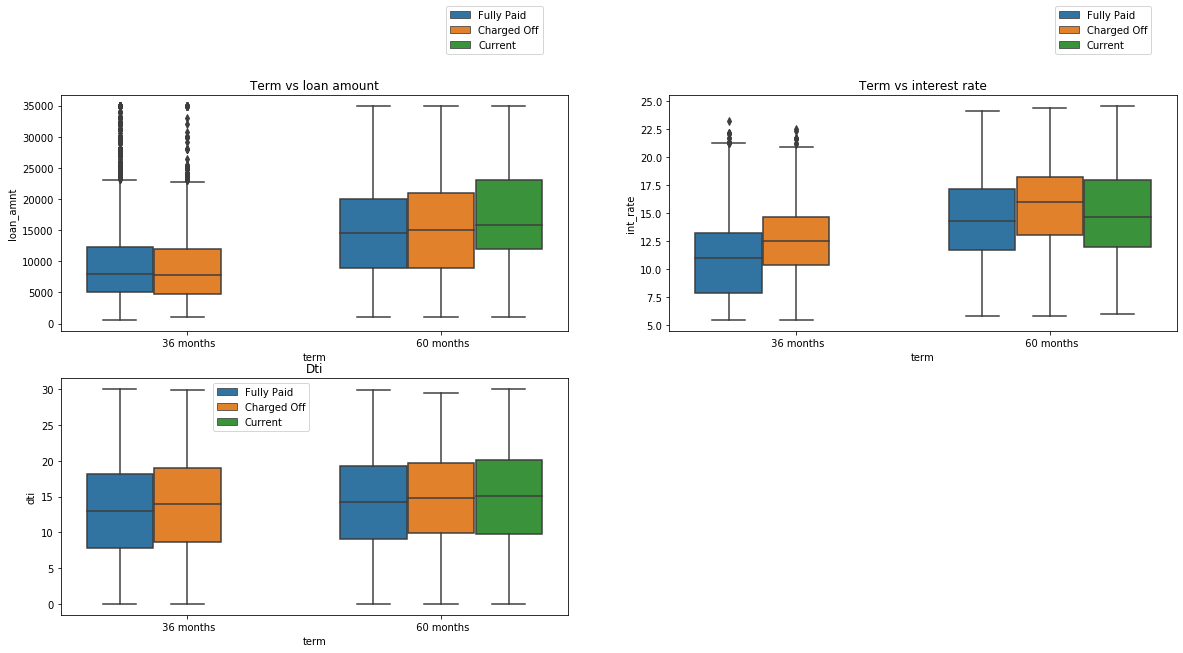

In [59]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=data)
plt.title("Term vs loan amount")
plt.legend(bbox_to_anchor=(0.75, 1.15))

plt.subplot(4,2,2)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=data)
plt.title("Term vs interest rate")
plt.legend(bbox_to_anchor=(0.75, 1.15))

plt.subplot(4,2,3)
sns.boxplot(x='term', y='dti', hue='loan_status', data=data)
plt.title("Dti")
plt.legend(bbox_to_anchor=(0.5, 1))

Observation : From above analysis on Term column we find
1. Influence of loan amount is least significant with respect to Term for defaulting.
2. Higher the interest rates chances of charge off is more, regardless of the number of terms.
3. Debt to income is almost the same for both the terms and does not impact defaulting decision.

### Grade - Analysis of grade column against other numeric values

In [60]:
grade_s=data.grade.value_counts().index
grade_s=grade_s.sort_values()

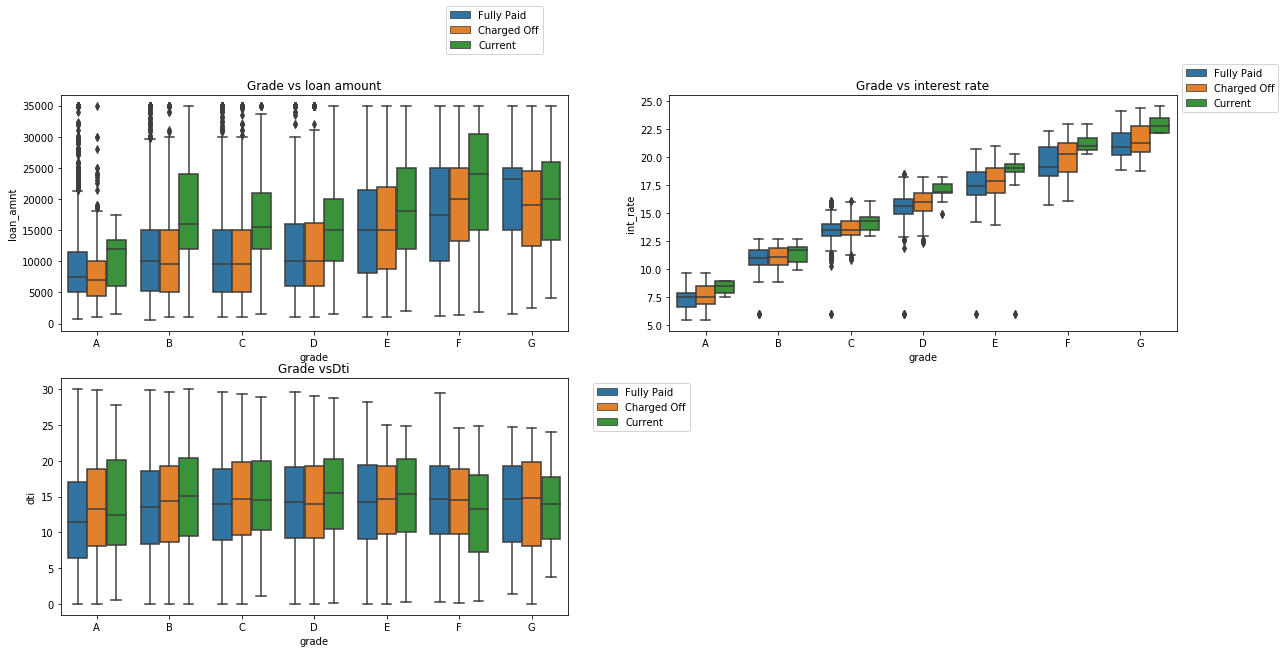

In [61]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=data,order=grade_s)
plt.title("Grade vs loan amount")
plt.legend(bbox_to_anchor=(0.75, 1.15))

plt.subplot(4,2,2)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=data,order=grade_s)
plt.title("Grade vs interest rate")
plt.legend(bbox_to_anchor=(1, 1.15))

plt.subplot(4,2,3)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=data,order=grade_s)
plt.title("Grade vsDti")
plt.legend(bbox_to_anchor=(1.25,1))

Observation - From above plots regarding Grade with respect to various numeric values we observe
1. Charge off increases with increase in Grade,especially Grade F shows siginificant rise in chargeoff.
2. Steady increase in interest rates with increase in Grade and so the defaulting behaviour.
3. DTI is uniformly spread across grades and does not influence defaulting decision.

### emp_length - Analysis of emp_length against other numeric values

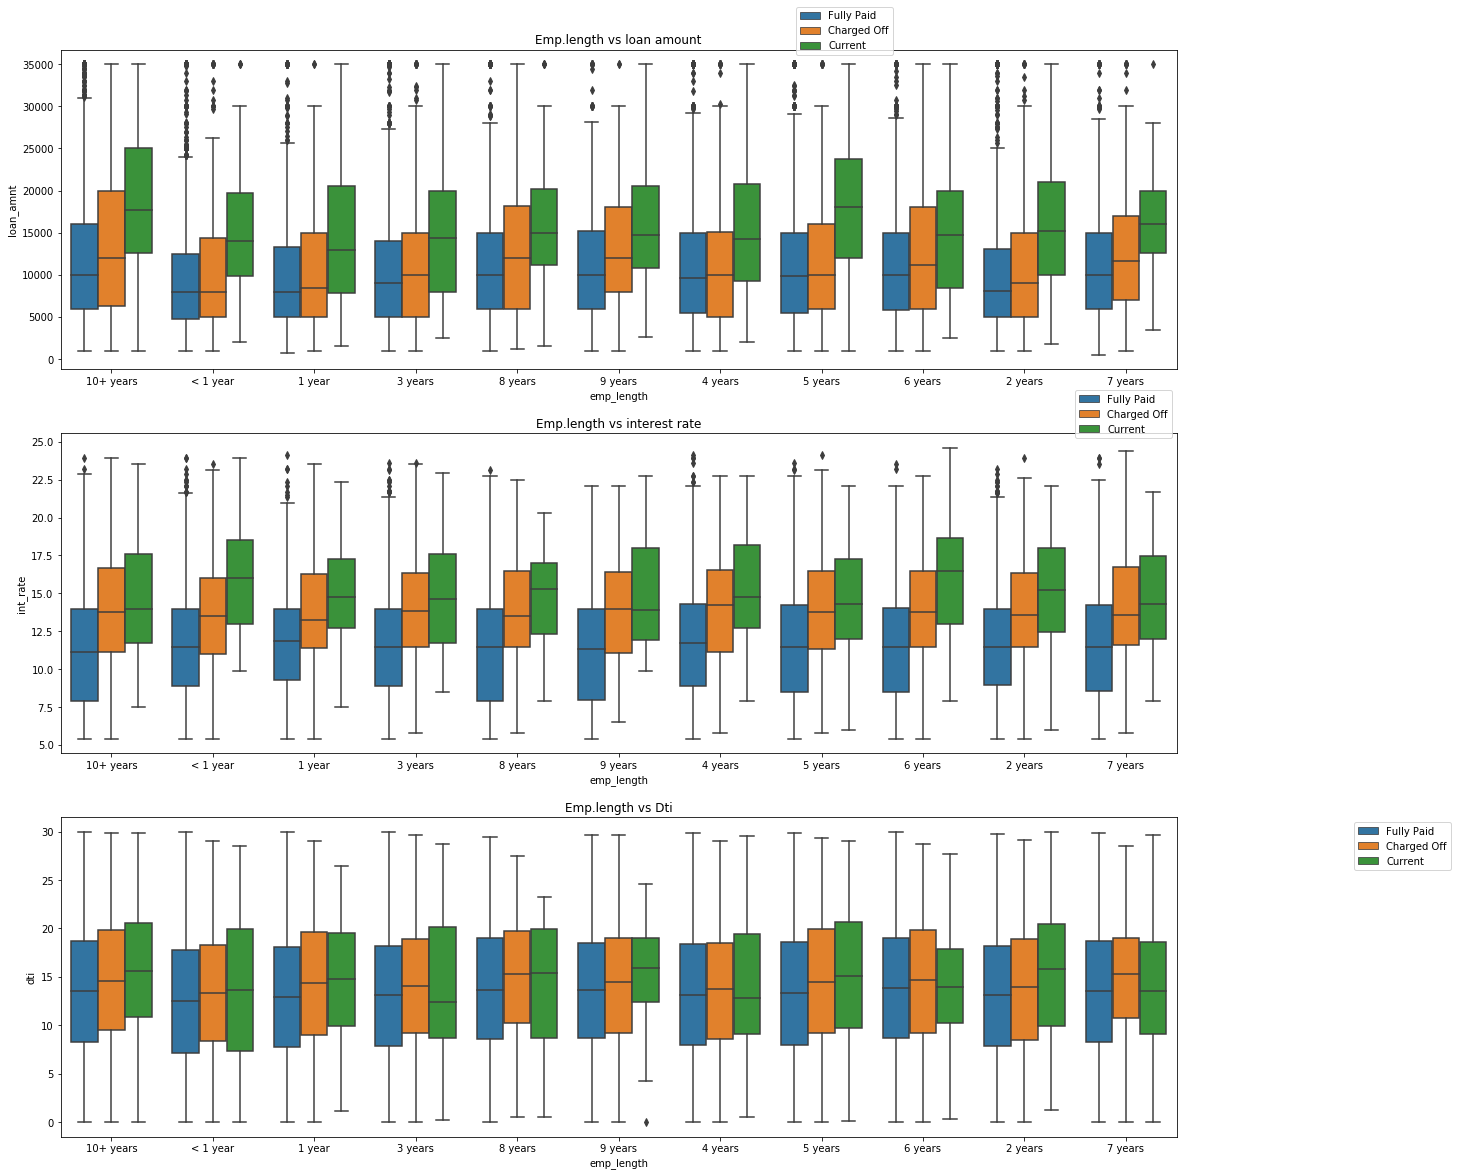

In [62]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data)
plt.title("Emp.length vs loan amount")
plt.legend(bbox_to_anchor=(0.75, 1.15))

plt.subplot(3,1,2)
sns.boxplot(x='emp_length', y='int_rate', hue='loan_status', data=data)
plt.title("Emp.length vs interest rate")
plt.legend(bbox_to_anchor=(1, 1.15))

plt.subplot(3,1,3)
sns.boxplot(x='emp_length', y='dti', hue='loan_status', data=data)
plt.title("Emp.length vs Dti")
plt.legend(bbox_to_anchor=(1.25,1))

Observation : Analysis of Emplength against numeric values implies the following
1. Higher the employment length, higher the loan amount,interest rates and defaulting behavior
2. DTI doesnot show significant effect on employment length vs loan status

#### Home ownership

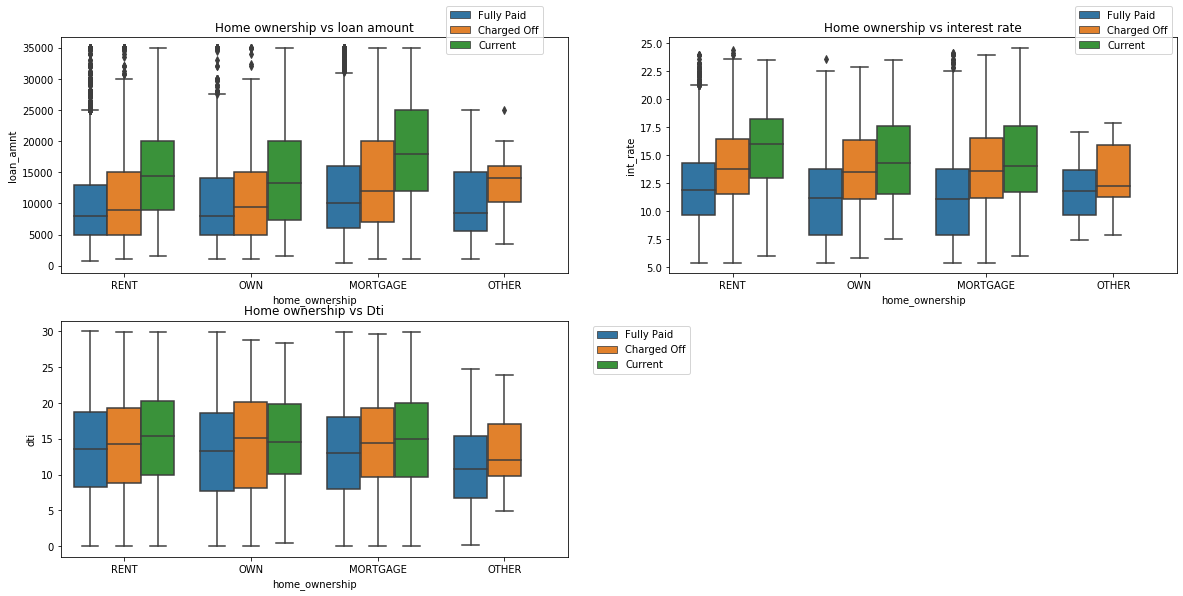

In [63]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=data)
plt.title("Home ownership vs loan amount")
plt.legend(bbox_to_anchor=(0.75, 1.15))

plt.subplot(4,2,2)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=data)
plt.title("Home ownership vs interest rate")
plt.legend(bbox_to_anchor=(1, 1.15))

plt.subplot(4,2,3)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=data)
plt.title("Home ownership vs Dti")
plt.legend(bbox_to_anchor=(1.25,1))

Observation : From the above plots we observe
    1. People who have mortgaged homes has higher loan amounts and default rate is high compared to other categories.
    2. Regardless of home ownership status higher the interest rates higher the defaulting rate
    3. DTI is not affecting loan status   

### Verification status

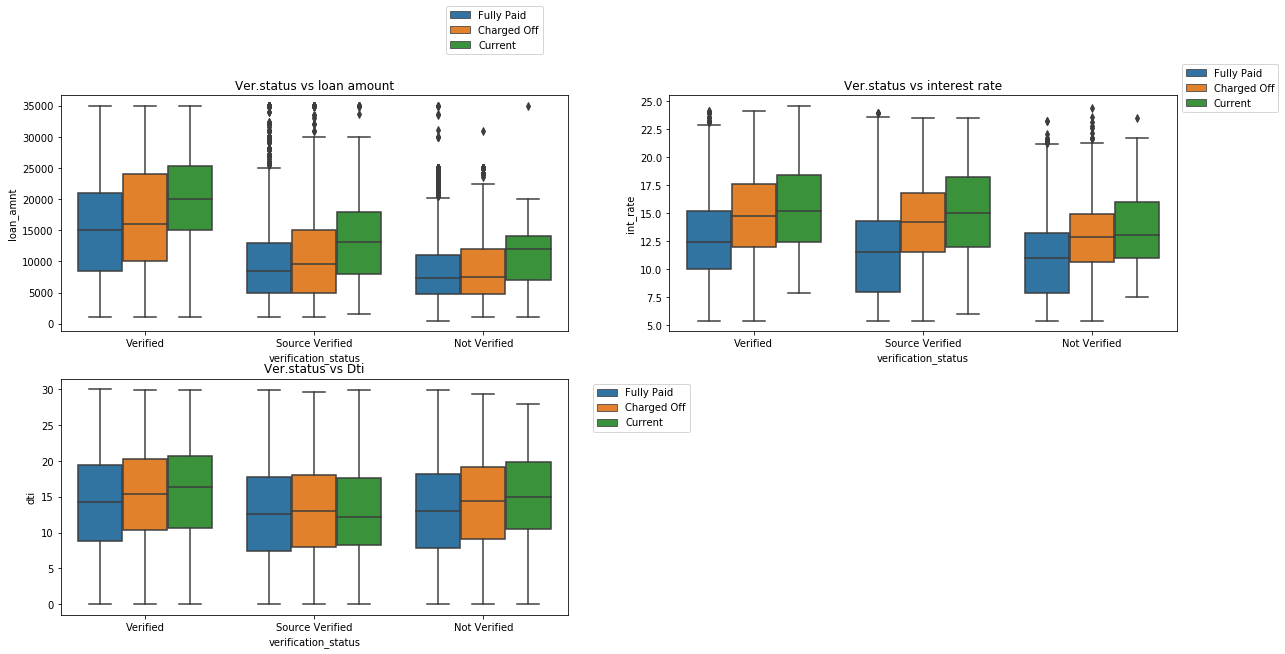

In [64]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data)
plt.title("Ver.status vs loan amount")
plt.legend(bbox_to_anchor=(0.75, 1.15))

plt.subplot(4,2,2)
sns.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=data)
plt.title("Ver.status vs interest rate")
plt.legend(bbox_to_anchor=(1, 1.15))

plt.subplot(4,2,3)
sns.boxplot(x='verification_status', y='dti', hue='loan_status', data=data)
plt.title("Ver.status vs Dti")
plt.legend(bbox_to_anchor=(1.25,1))

Observation : From above plots we observe
1. Strangelyverified and source verified has more charged offs than Not verified
2. When the interest rates are higher chargeoffs are higher regardless of verification status
3. DTI doesnot show too much difference in chargeoff behavior

### Default analysis based on timelines

Text(0.5, 1.0, 'Month')

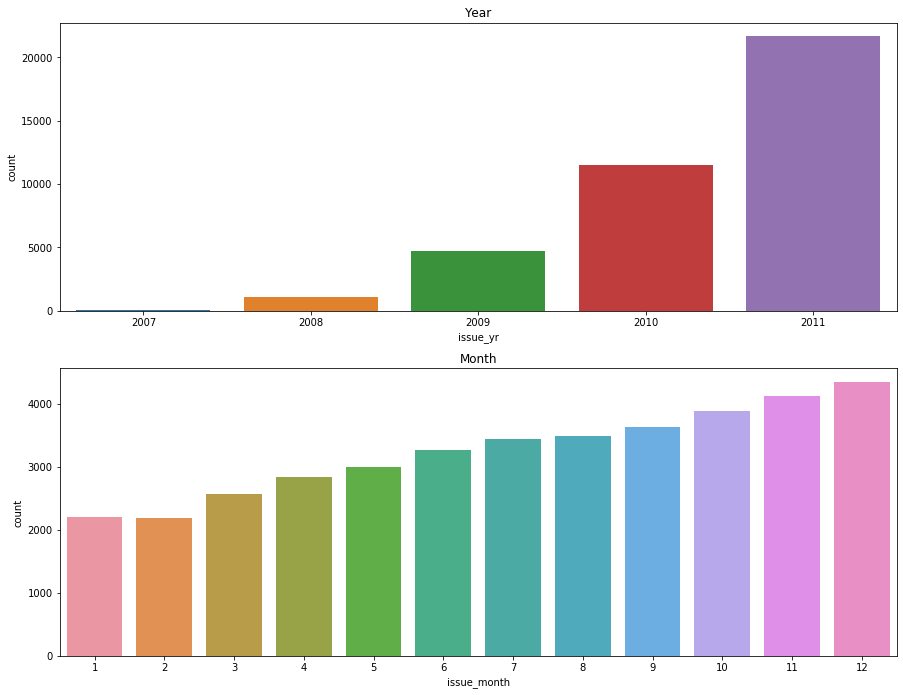

In [97]:
plt.figure(figsize=(15,18))
plt.subplot(3,1,1)
sns.countplot(data['issue_yr'], order=sorted(data.issue_yr.unique()))
plt.title("Year")

plt.subplot(3,1,2)
sns.countplot(data['issue_month'], order=sorted(data.issue_month.unique()))
plt.title("Month")



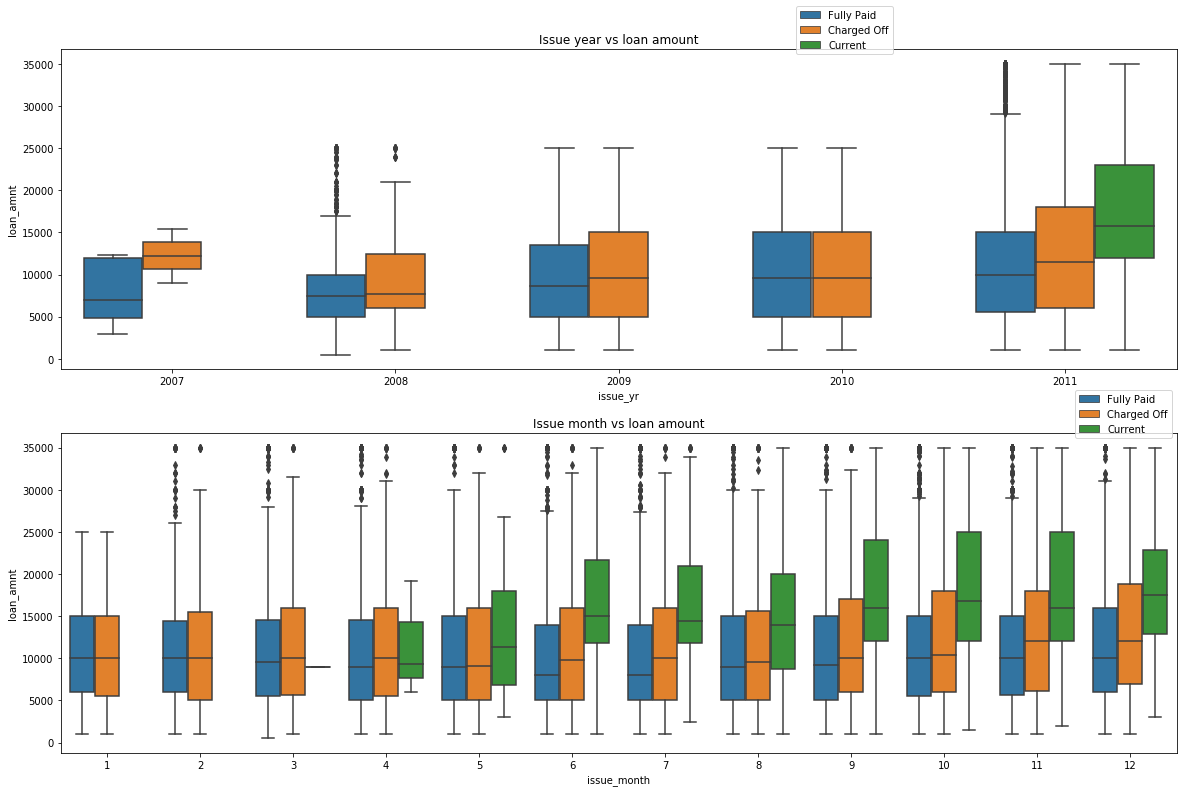

In [72]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.boxplot(x='issue_yr', y='loan_amnt', hue='loan_status', data=data)
plt.title("Issue year vs loan amount")
plt.legend(bbox_to_anchor=(0.75, 1.15))

plt.subplot(3,1,2)
sns.boxplot(x='issue_month', y='loan_amnt', hue='loan_status', data=data)
plt.title("Issue month vs loan amount")
plt.legend(bbox_to_anchor=(1, 1.15))

In [69]:
data.nunique()

loan_amnt                 875
funded_amnt              1034
funded_amnt_inv          7859
term                        2
int_rate                  337
installment             14972
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              4
annual_inc               5250
verification_status         3
issue_d                    52
loan_status                 3
purpose                    14
addr_state                 49
dti                      2868
delinq_2yrs                11
earliest_cr_line          526
inq_last_6mths              9
open_acc                   38
pub_rec                     5
revol_bal               21490
revol_util               1089
total_acc                  82
total_pymnt             37109
total_pymnt_inv         36791
pub_rec_bankruptcies        3
issue_month                12
issue_yr                    5
earliest_cr_month          12
earliest_cr_year           53
earliest_cr_day             1
dtype: int

To further aid in data cleaning, an understanding of correlation among attributes will be helpful. So plotting the correlation among variables in dataset

In [70]:
data.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,revol_bal,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies,issue_month,issue_yr,earliest_cr_month,earliest_cr_year,earliest_cr_day
loan_amnt,1.000000,0.981552,0.953991,0.310099,0.929839,0.275046,0.065156,-0.032761,0.007458,0.177629,...,0.320062,0.256436,0.887040,0.864961,-0.037346,0.067308,0.124253,-0.013593,-0.170152,NaN
funded_amnt,0.981552,1.000000,0.973326,0.313646,0.955777,0.271179,0.065255,-0.033229,0.007533,0.176089,...,0.313055,0.250729,0.903717,0.882337,-0.038668,0.058415,0.136537,-0.013178,-0.163570,NaN
funded_amnt_inv,0.953991,0.973326,1.000000,0.305402,0.923524,0.262246,0.068324,-0.037183,-0.002993,0.166367,...,0.297354,0.241999,0.891664,0.911408,-0.042949,0.073783,0.220479,-0.012689,-0.153710,NaN
int_rate,0.310099,0.313646,0.305402,1.000000,0.283915,0.054945,0.106666,0.158605,0.135929,0.011559,...,0.098480,-0.044229,0.309081,0.302432,0.082714,0.036958,0.040040,-0.008159,0.103042,NaN
installment,0.929839,0.955777,0.923524,0.283915,1.000000,0.275374,0.053598,-0.020968,0.007458,0.173323,...,0.315527,0.231503,0.857632,0.832204,-0.034258,0.040772,0.062774,-0.009449,-0.149101,NaN
annual_inc,0.275046,0.271179,0.262246,0.054945,0.275374,1.000000,-0.122653,0.023111,0.032477,0.160036,...,0.279558,0.238652,0.262216,0.254120,-0.016857,0.010437,0.012717,-0.008665,-0.165013,NaN
dti,0.065156,0.065255,0.068324,0.106666,0.053598,-0.122653,1.000000,-0.034993,0.001604,0.289357,...,0.229193,0.228391,0.063298,0.065884,0.005418,0.014810,0.082275,0.007445,-0.036538,NaN
delinq_2yrs,-0.032761,-0.033229,-0.037183,0.158605,-0.020968,0.023111,-0.034993,1.000000,0.008166,0.012574,...,-0.057003,0.068857,-0.023311,-0.027619,0.003425,-0.011787,0.003311,-0.000350,-0.062446,NaN
inq_last_6mths,0.007458,0.007533,-0.002993,0.135929,0.007458,0.032477,0.001604,0.008166,1.000000,0.092129,...,-0.025591,0.112535,-0.010986,-0.018102,0.016341,0.013231,-0.058771,-0.006929,-0.011626,NaN
open_acc,0.177629,0.176089,0.166367,0.011559,0.173323,0.160036,0.289357,0.012574,0.092129,1.000000,...,0.287811,0.685893,0.163181,0.155639,0.005831,0.004100,0.015950,0.003542,-0.195135,NaN


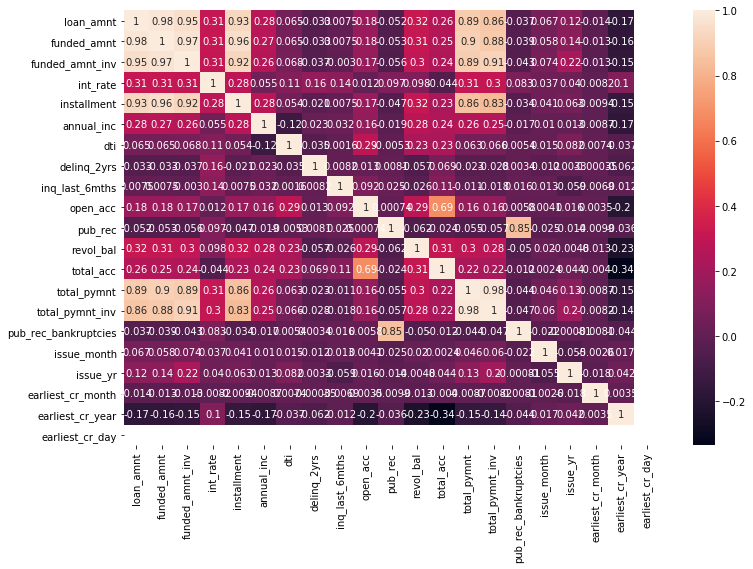

In [71]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True)

From above heatmap we find Loan_amnt has high positive correlation with the following attributes
1. funded_amnt
2. funded_amnt_inv
3. installment
